# Project CLustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Q. Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.


In [2]:
df1 = pd.read_excel("Clustering Clean Ads_Data-2.xlsx")

In [3]:
df1.shape

(23066, 19)

* **The given  dataset has 23066 rows and 19 columns.**


### Let's check if the data has been correctly loaded using head() and tail function.

In [4]:
df1.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [5]:
df1.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


* **We can observe that number of rows and columns are 23066 and 19 respectively so let's further investigate the data.**

### Let's check for any duplicates in the data.

In [6]:
df1.duplicated().sum()

0

* **It can be observed that dataset has xero duplicates**

### Performing Data Profiling with df.info() Method: Understanding DataFrame's Structure and Data Types.

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

Here are some observations about the DataFrame:

- The DataFrame has 23066 entries (rows) and 19 columns.
- The `Timestamp`, `InventoryType`, `Ad Type`, `Platform`, `Device Type`, and `Format` columns are of object data type, which suggests they contain string values.
- The `Ad - Length`, `Ad- Width`, `Ad Size`, `Available_Impressions`, `Matched_Queries`, `Impressions`, and `Clicks` columns are of integer data type, indicating they contain numerical values.
- The `Spend`, `Fee`, `Revenue`, `CTR`, `CPM`, and `CPC` columns are of float data type, suggesting they contain decimal or floating-point values.
- The `CTR`, `CPM`, and `CPC` columns have missing values, with only 18330 non-null values each. This could mean that some records in the DataFrame have missing values for these columns, or that the data was not recorded for some observations.
- The rest of the DataFrame appears to have no missing values, as all columns have 23066 non-null values.


**Let's drop the Time_stamp as it might deter our further analysis.**

In [8]:
df1 = df1.drop('Timestamp', axis=1)


In [9]:
df1.head()

,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


### Data Summary

* **For Numerical values.**

In [10]:
df1.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,18330.000000,18330.000000,18330.000000
mean,385.163097,337.896037,96674.468048,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,0.073661,7.672045,0.351061
std,233.651434,203.092885,61538.329557,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,0.075160,6.481391,0.343334
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.000100,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.002600,1.710000,0.090000
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,0.082550,7.660000,0.160000
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,0.130000,12.510000,0.570000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000


From this table, we can observe the following:

- Ad- Length, Ad- Width, and Ad Size columns have minimum and maximum values that make sense in the context of ad dimensions. 
- Available_Impressions, Matched_Queries, Impressions, Clicks, Spend, Fee, Revenue columns have a very wide range of values indicating a high variation in these variables.
- CTR, CPM, and CPC columns have a low standard deviation relative to their mean, indicating that most of the data points in these columns are close to the mean.

* **For Categorical values.**

In [11]:
df1.describe(include=['O'])


,InventoryType,Ad Type,Platform,Device Type,Format
count,23066,23066,23066,23066,23066
unique,7,14,3,2,2
top,Format4,Inter224,Video,Mobile,Video
freq,7165,1658,9873,14806,11552


From this, we can observe the following:

- There are 7 unique 'InventoryType' values in the dataset,Format4 being the most Frequent type.
- There are 14 unique 'Ad Type' values in the dataset, with 'Inter224' being the most frequent type.
- There are 3 unique 'Platform' values in the dataset, with 'Video' being the most frequent.
- There are 2 unique 'Device Type' values in the dataset, with 'Mobile' being the most frequent.
- There are 2 unique 'Format' values in the dataset, with 'Video' being the most frequent.

# Q. Treat missing values in CPC, CTR and CPM using the formula given.

In [12]:
df1.isnull().sum()

InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

* **We observe there are missing values IN CPC, CTR,CPM, so we treat the same using the given formula**

Formula:
    
- CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

- CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

- CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 


In [13]:
# define function to treat missing values
def treat_missing_values(df):
    # CPM
    cpm = (df['Spend'] / df['Impressions']) * 1000
    df['CPM'] = np.where(df['CPM'].isna(), cpm, df['CPM'])
    
    # CPC
    cpc = df['Spend'] / df['Clicks']
    df['CPC'] = np.where(df['CPC'].isna(), cpc, df['CPC'])
    
    # CTR
    ctr = (df['Clicks'] / df['Impressions']) * 100
    df['CTR'] = np.where(df['CTR'].isna(), ctr, df['CTR'])
    
    return df

# call function to treat missing values
df = treat_missing_values(df1)


In [14]:
df1.isnull().sum()

InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

# Q.Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

* **Checking for outliers in the numerical data**

In [15]:
df1.head()

,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [16]:
# Calculate the interquartile range (IQR) for each column
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

# Find the outliers for each column
outliers = ((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR)))

# Print the number of outliers in each column
print(outliers.sum())


Ad - Length                 0
Ad Size                  8448
Ad Type                     0
Ad- Width                   0
Available_Impressions    2378
CPC                       568
CPM                       208
CTR                      3487
Clicks                   1691
Device Type                 0
Fee                      3517
Format                      0
Impressions              3269
InventoryType               0
Matched_Queries          3192
Platform                    0
Revenue                  2325
Spend                    2081
dtype: int64


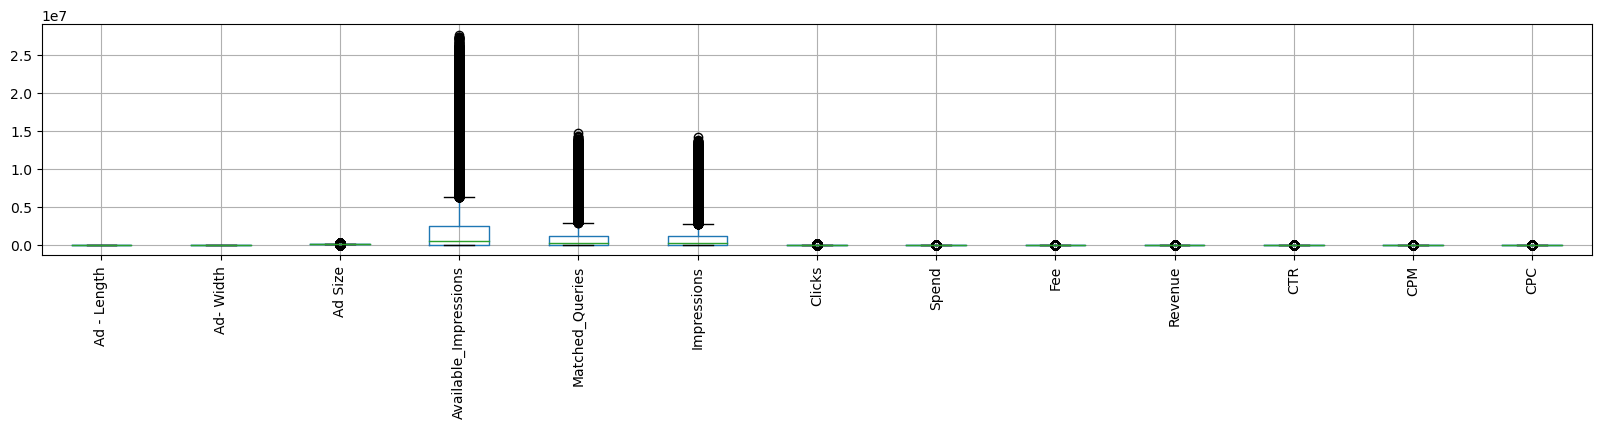

In [17]:
df1.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

* **Treating outliers in K-Means clustering is a matter of judgement and depends on the specific situation and dataset. Outliers are extreme values that are significantly different from other values in the dataset and can have a significant impact on the clustering results. Therefore, it is important to evaluate whether outliers should be treated before running K-Means clustering.**

* **In general, it is recommended to treat outliers if they are significant and the clustering results are sensitive to their presence. However, it is important to be cautious when treating outliers, as removing too many outliers can lead to loss of information and affect the representativeness of the dataset.**

* **In general, K-means clustering is sensitive to outliers because it tries to minimize the sum of squared distances between each data point and its assigned centroid. Outliers can have a significant impact on the distances and can result in centroids being pulled towards them. This can lead to suboptimal clustering results, where the centroids are not representative of the actual clusters.**

* **We will perform outlier treatment using Interquartile range (IQR) method.This involves calculating the IQR for each column, and then removing values that fall outside a certain range. The range is typically defined as 1.5 times the IQR below the first quartile or above the third quartile.**



### Treating the outliers

In [18]:
# Define a function to treat outliers using the .75 and .25 quantiles
def treat_outliers_quantiles(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df[col_name] = np.where(df[col_name] < lower_bound, lower_bound, df[col_name])
    df[col_name] = np.where(df[col_name] > upper_bound, upper_bound, df[col_name])
    
# Treat outliers for numerical columns using .75 and .25 quantiles
num_cols = df1.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    treat_outliers_quantiles(df1, col)


* **Re-checking if we have aby outliers**

In [19]:
# Calculate the interquartile range (IQR) for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Find the outliers for each column
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Print the number of outliers in each column
print(outliers.sum())

Ad - Length              0
Ad Size                  0
Ad Type                  0
Ad- Width                0
Available_Impressions    0
CPC                      0
CPM                      0
CTR                      0
Clicks                   0
Device Type              0
Fee                      0
Format                   0
Impressions              0
InventoryType            0
Matched_Queries          0
Platform                 0
Revenue                  0
Spend                    0
dtype: int64


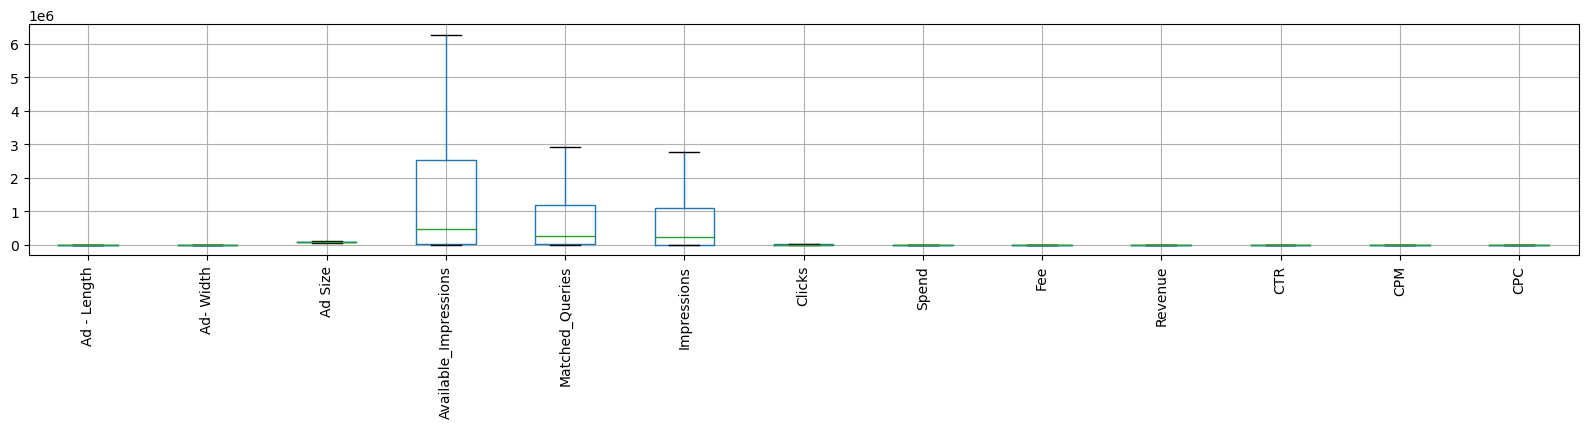

In [20]:
df1.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

# Q.Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [21]:
df1.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000
mean,385.163097,337.896037,76576.835169,1.607253e+06,7.995380e+05,7.536120e+05,8306.828194,2166.060098,0.340288,1449.388572,0.140902,8.219063,0.330236
std,233.651434,203.092885,15381.320695,2.125528e+06,1.026037e+06,9.802568e+05,9574.779384,2425.189632,0.018129,1646.893583,0.154629,6.880549,0.317194
min,120.000000,70.000000,54000.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.300000,0.000000,0.000100,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.003400,1.750000,0.090000
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,0.112650,8.370742,0.140000
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,0.183778,13.040000,0.550000
max,728.000000,600.000000,102000.000000,6.268771e+06,2.924326e+06,2.769086e+06,30919.375000,7675.730000,0.350000,5145.297312,0.454344,29.975000,1.240000


* **Scaling is necessary in many machine learning algorithms to ensure that the features are on the same scale or have the same range. This is important because many algorithms use some form of distance calculation to compare feature vectors, and if the features are on different scales, then the algorithm may give more weight to features with larger values, even if they are not actually more important for the problem at hand.**

* **For example, in k-means clustering, the algorithm calculates distances between data points to assign them to clusters. If the features are not scaled, then features with larger ranges will dominate the distances, potentially leading to incorrect cluster assignments.**

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   InventoryType          23066 non-null  object 
 1   Ad - Length            23066 non-null  float64
 2   Ad- Width              23066 non-null  float64
 3   Ad Size                23066 non-null  float64
 4   Ad Type                23066 non-null  object 
 5   Platform               23066 non-null  object 
 6   Device Type            23066 non-null  object 
 7   Format                 23066 non-null  object 
 8   Available_Impressions  23066 non-null  float64
 9   Matched_Queries        23066 non-null  float64
 10  Impressions            23066 non-null  float64
 11  Clicks                 23066 non-null  float64
 12  Spend                  23066 non-null  float64
 13  Fee                    23066 non-null  float64
 14  Revenue                23066 non-null  float64
 15  CT

In [23]:
df1_num = df.select_dtypes(include='number')


In [24]:
df1_num

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300.0,250.0,75000.0,1806.0,325.0,323.0,1.0,0.00,0.35,0.0000,0.003100,0.000,0.00
1,300.0,250.0,75000.0,1780.0,285.0,285.0,1.0,0.00,0.35,0.0000,0.003500,0.000,0.00
2,300.0,250.0,75000.0,2727.0,356.0,355.0,1.0,0.00,0.35,0.0000,0.002800,0.000,0.00
3,300.0,250.0,75000.0,2430.0,497.0,495.0,1.0,0.00,0.35,0.0000,0.002000,0.000,0.00
4,300.0,250.0,75000.0,1218.0,242.0,242.0,1.0,0.00,0.35,0.0000,0.004100,0.000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720.0,300.0,102000.0,1.0,1.0,1.0,1.0,0.07,0.35,0.0455,0.454344,29.975,0.07
23062,720.0,300.0,102000.0,3.0,2.0,2.0,1.0,0.04,0.35,0.0260,0.454344,20.000,0.04
23063,720.0,300.0,102000.0,2.0,1.0,1.0,1.0,0.05,0.35,0.0325,0.454344,29.975,0.05
23064,120.0,600.0,72000.0,7.0,1.0,1.0,1.0,0.07,0.35,0.0455,0.454344,29.975,0.07


**Performing Scaling on continous numerical values**

In [25]:
from sklearn.preprocessing import StandardScaler

# create an instance of the StandardScaler
scaler = StandardScaler()

# apply scaling to the numerical columns
df1_num_scaled = scaler.fit_transform(df1_num)


In [26]:
df1_num_scaled


array([[-0.3644957 , -0.43279676, -0.10251846, ..., -0.89120141,
        -1.19456185, -1.04114024],
       [-0.3644957 , -0.43279676, -0.10251846, ..., -0.88861451,
        -1.19456185, -1.04114024],
       [-0.3644957 , -0.43279676, -0.10251846, ..., -0.89314159,
        -1.19456185, -1.04114024],
       ...,
       [ 1.43309269, -0.18659865,  1.65289551, ...,  2.02710758,
         3.16201634, -0.88350446],
       [-1.13489073,  1.29058999, -0.29756446, ...,  2.02710758,
         3.16201634, -0.82045015],
       [ 1.43309269, -0.18659865,  1.65289551, ...,  2.02710758,
         3.16201634, -0.75739583]])

* **The relationship between z-score scaling and the speed of an algorithm depends on the specific algorithm and the data being used. However, in general, z-score scaling does not significantly affect the speed of most algorithms. The computational complexity of z-score scaling is relatively low and does not introduce any additional iterative steps.**

* **The main purpose of z-score scaling is to ensure that variables are on a similar scale, which can be beneficial for certain algorithms that are sensitive to the scale of the variables. It can help prevent variables with larger scales from dominating the algorithm's computations and affecting its performance.**

* **Some algorithms, such as gradient-based optimization algorithms used in machine learning, can benefit from z-score scaling by improving convergence speed. When variables are on a similar scale, the optimization process can converge faster as the algorithm does not have to take large steps to update the weights or parameters.**

* **Additionally, z-score scaling can also help with the interpretation of results. By standardizing variables, their values become comparable, and it becomes easier to understand the relative importance and effects of different variables in the algorithm.**

* **It's worth noting that the impact of z-score scaling on algorithm speed may vary depending on the size of the dataset and the computational resources available. In large-scale datasets, the additional computational cost of z-score scaling might become more noticeable, but it is generally still negligible compared to the overall complexity of most algorithms.**

# Q.Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [27]:
df1_num_scaled

array([[-0.3644957 , -0.43279676, -0.10251846, ..., -0.89120141,
        -1.19456185, -1.04114024],
       [-0.3644957 , -0.43279676, -0.10251846, ..., -0.88861451,
        -1.19456185, -1.04114024],
       [-0.3644957 , -0.43279676, -0.10251846, ..., -0.89314159,
        -1.19456185, -1.04114024],
       ...,
       [ 1.43309269, -0.18659865,  1.65289551, ...,  2.02710758,
         3.16201634, -0.88350446],
       [-1.13489073,  1.29058999, -0.29756446, ...,  2.02710758,
         3.16201634, -0.82045015],
       [ 1.43309269, -0.18659865,  1.65289551, ...,  2.02710758,
         3.16201634, -0.75739583]])

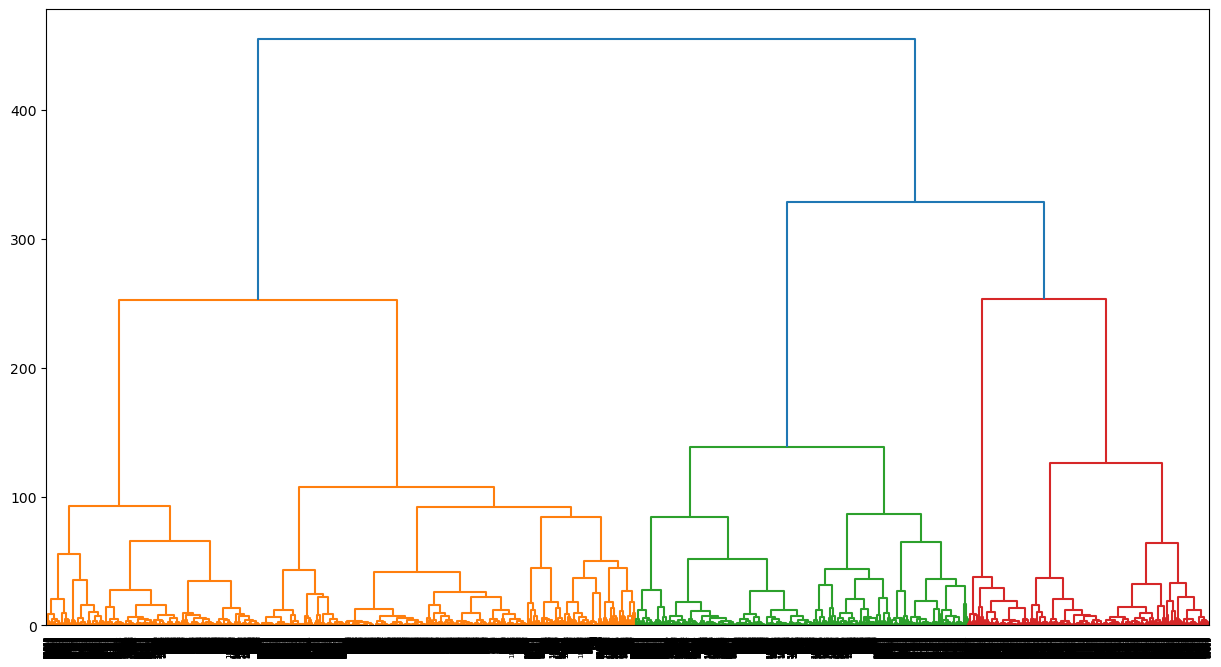

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

# calculate the linkage matrix using Ward linkage and Euclidean distance
wardlink = linkage(df1_num_scaled, method='ward', metric='euclidean')

# plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(wardlink)
plt.show()


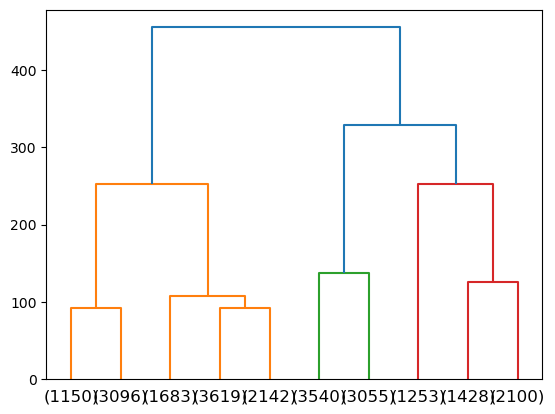

In [29]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [30]:
from scipy.cluster.hierarchy import fcluster

In [31]:
clusters_1 = fcluster(wardlink, 3, criterion='maxclust')
clusters_1

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

#  Q.Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

**Let's perform K-means algoithm when n=1**

* **Within-Cluster Sum of Squares, which is a measure of the variability of the data within the clusters. It is calculated as the sum of the squared distances between each point and its assigned cluster centroid.**

* **let's fit a KMeans clustering model with a single cluster (n_clusters=1) and calculates the inertia, which is the sum of squared distances of samples to their closest cluster center. In this case, since there is only one cluster, the WSS is equal to the inertia.**

In [32]:
KM =KMeans(n_clusters=1)
KM.fit(df1_num_scaled)
KM.inertia_

299858.0

**Let's perform K-means clustering from n=1 to n=10 and store the wss .**

In [33]:
wss =[] 

In [34]:
for i in range(1,11):
    KM =KMeans(n_clusters=i)
    KM.fit(df1_num_scaled)
    wss.append(KM.inertia_)

In [35]:
wss

[299858.0,
 187902.64770993276,
 139992.99382058423,
 105294.16522885158,
 72133.68402187488,
 62259.98939794785,
 55151.541665569486,
 49979.86368096868,
 45194.44039663942,
 41739.361952142266]

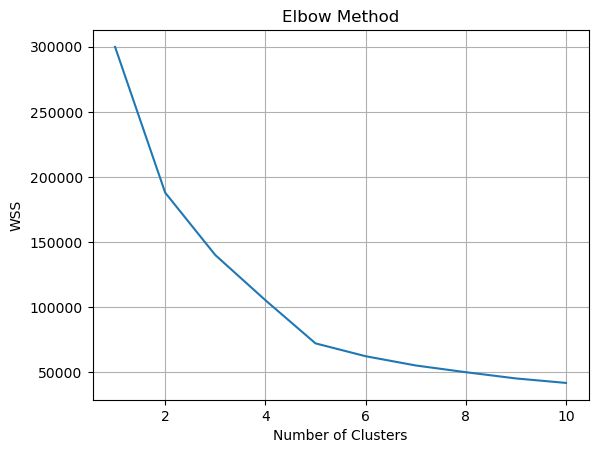

In [36]:
plt.plot(range(1, 11), wss)
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.title('Elbow Method')
plt.grid(True)  # Add grid
plt.show()

* **From the data as well as elbow plot, 3and 5 both seems to be a strong contender for clustering.**
* **Let's first calculate the clusters from 3 and 5 and then using silhoutte score to identify the best suited clustering for the given problem.**

In [37]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df1_num_scaled)
labels_3 = k_means.labels_

In [38]:
labels_3

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [39]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df1_num_scaled)
labels_5 = k_means.labels_

In [40]:
labels_5

array([0, 0, 0, ..., 3, 1, 3], dtype=int32)

# Q.Print silhouette scores for up to 10 clusters and identify optimum number of clusters.


**Let's calculate the silhouette score for n=2 clusters first**

In [41]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(df1_num_scaled)
labels = k_means.labels_

In [42]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [43]:
# Calculating silhouette_score
silhouette_score(df1_num_scaled,labels,random_state=1)

0.4031872580443277

**Let's run a loop to find a slihouttes scored for upto 10**

In [44]:
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    
    # initialize K means
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1_num_scaled)
    cluster_labels=kmeans.labels_
    #Silhouette Score
    silhouette_avg = silhouette_score(df1_num_scaled,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4031872580443277
For n_clusters=3, the silhouette score is 0.34546227138651775
For n_clusters=4, the silhouette score is 0.4032921585940856
For n_clusters=5, the silhouette score is 0.480207830782331
For n_clusters=6, the silhouette score is 0.47613811534407585
For n_clusters=7, the silhouette score is 0.4688307485791764
For n_clusters=8, the silhouette score is 0.43286832931764
For n_clusters=9, the silhouette score is 0.427514209638936
For n_clusters=10, the silhouette score is 0.42900290110987793


* It can be observed that the silhouette score is highest for n_clusters=5, indicating that this is the optimal number of clusters for the given data.
* The silhouette score measures how well each data point in a cluster is separated from other clusters, with a higher score indicating better separation. 
* Based on the above scores, 5 clusters provide the best separation of data points while maintaining a reasonable number of clusters.

 # QProfile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].

**Let's obtain labels for the 5 clusters**

In [45]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df1_num_scaled)
labels_5 = k_means.labels_

In [46]:
df1['Clus_Kmeans'] = labels_5

In [47]:
df1.head(5)

,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_Kmeans
0,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.0031,0.0,0.0,3
1,Format1,300.0,250.0,75000.0,Inter227,App,Mobile,Video,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.0035,0.0,0.0,3
2,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.0028,0.0,0.0,3
3,Format1,300.0,250.0,75000.0,Inter228,Video,Mobile,Video,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.0020,0.0,0.0,3
4,Format1,300.0,250.0,75000.0,Inter217,Web,Desktop,Video,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.0041,0.0,0.0,3


In [48]:
df1.tail()

,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_Kmeans
23061,Format5,720.0,300.0,102000.0,Inter220,Web,Mobile,Video,1.0,1.0,1.0,1.0,0.07,0.35,0.0455,0.454344,29.975,0.07,4
23062,Format5,720.0,300.0,102000.0,Inter224,Web,Desktop,Video,3.0,2.0,2.0,1.0,0.04,0.35,0.0260,0.454344,20.000,0.04,4
23063,Format5,720.0,300.0,102000.0,Inter218,App,Mobile,Video,2.0,1.0,1.0,1.0,0.05,0.35,0.0325,0.454344,29.975,0.05,4
23064,Format4,120.0,600.0,72000.0,inter230,Video,Mobile,Video,7.0,1.0,1.0,1.0,0.07,0.35,0.0455,0.454344,29.975,0.07,0
23065,Format5,720.0,300.0,102000.0,Inter221,App,Mobile,Video,2.0,2.0,2.0,1.0,0.09,0.35,0.0585,0.454344,29.975,0.09,4


In [49]:

# Calculate cluster profiles
cluster_profiles = df1.groupby('Clus_Kmeans').mean()

# Print the cluster profiles
print(cluster_profiles)


             Ad - Length   Ad- Width        Ad Size  Available_Impressions  \
Clus_Kmeans                                                                  
0             146.047282  568.378256   74136.726397           3.651906e+04   
1             465.880958  199.212151   72970.432205           5.697675e+06   
2             141.543860  572.482131   73703.703704           8.055940e+05   
3             424.531856  146.064853   63776.763891           1.838470e+06   
4             681.857872  305.372340  100785.957447           2.633999e+05   

             Matched_Queries   Impressions        Clicks        Spend  \
Clus_Kmeans                                                             
0               2.182872e+04  1.568348e+04   1888.217889   210.054349   
1               2.807234e+06  2.672181e+06  11253.998024  5742.133729   
2               5.663903e+05  4.777502e+05  30562.689571  6541.996751   
3               8.785300e+05  8.399846e+05   3304.578784  1524.291647   
4              

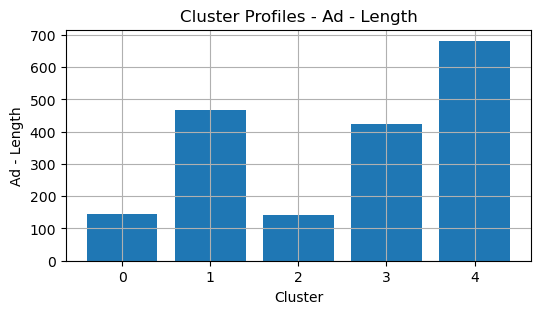

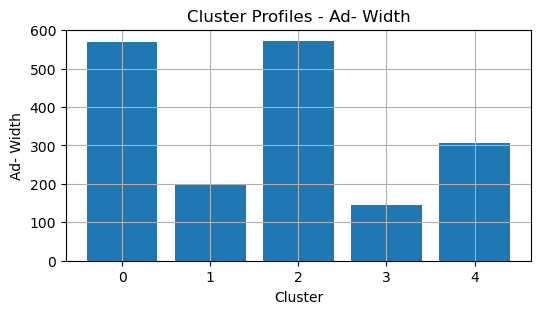

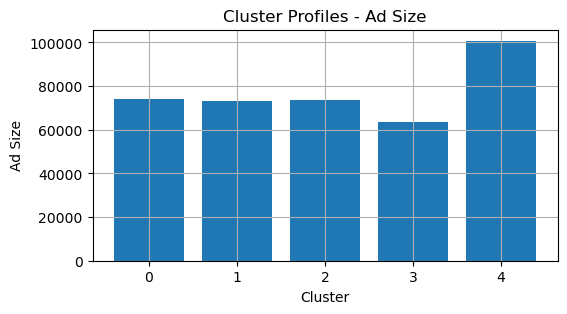

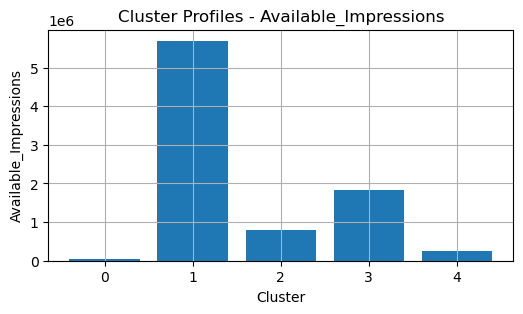

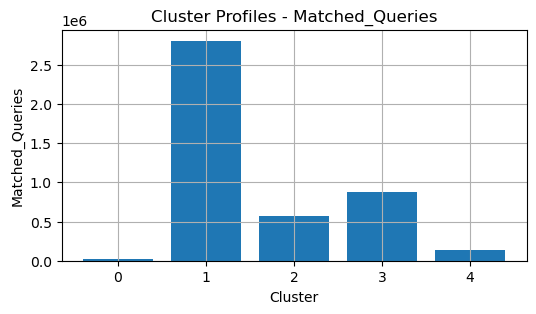

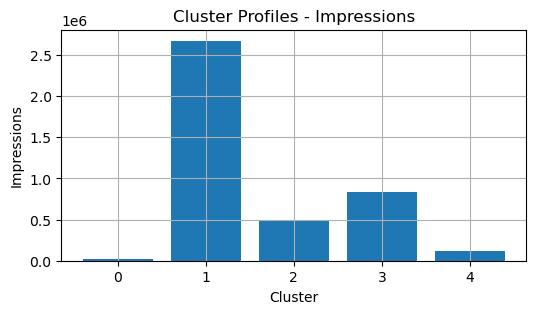

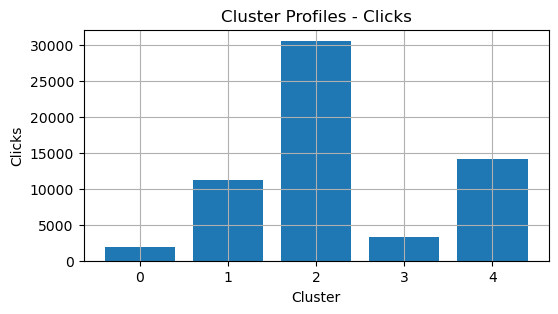

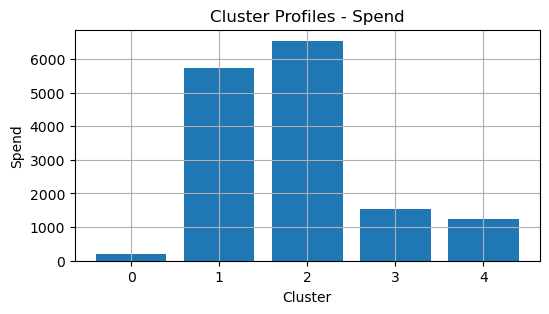

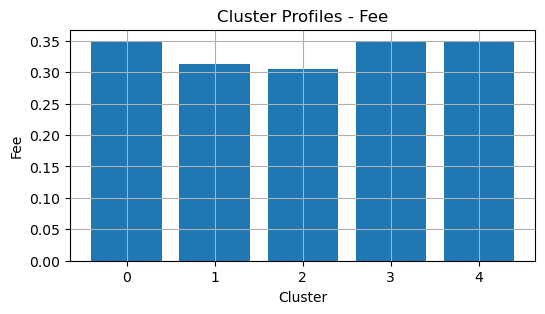

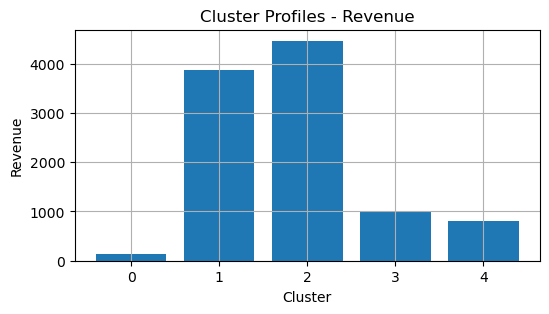

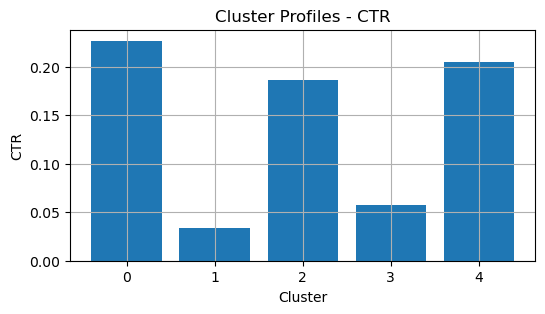

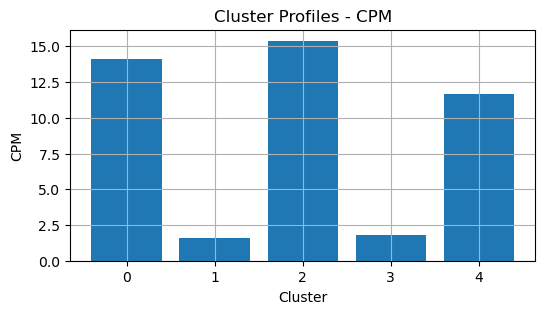

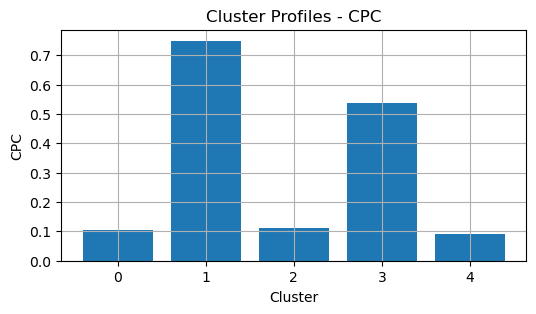

In [50]:


# Get the number of clusters
num_clusters = len(cluster_profiles)

# Get the feature names for the x-axis
feature_names = cluster_profiles.columns.tolist()

# Create individual bar plots for each feature
for feature in feature_names:
    # Get the average values for the feature in each cluster
    feature_values = cluster_profiles[feature].values
    
    # Create the bar plot
    plt.figure(figsize=(6, 3))  # Adjust the figsize as per your requirements
    plt.bar(range(num_clusters), feature_values)
    plt.xticks(range(num_clusters), range(num_clusters))
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.title(f'Cluster Profiles - {feature}')
    plt.grid(True)
    
    # Show the plot
    plt.show()


**Here are some observations that can be derived:**

**Cluster 0:**

* **Advertisements in this cluster have medium-length and narrow width.**
* **The ad size is relatively small.**
* **The available impressions are high, indicating a wide reach.**
* **The CTR (Click-Through Rate) is relatively low, suggesting a lower engagement rate.**
* **The CPM (Cost per 1000 Impressions) and CPC (Cost per Click) values are relatively low, indicating lower costs for advertising.**

**Cluster 1:**

* **Advertisements in this cluster have longer length and wider width.**
* **The ad size is larger compared to other clusters.**
* **The available impressions are relatively low.**
* **The CTR is higher, indicating a higher engagement rate.**
* **The CPM and CPC values are moderate.**

**Cluster 2:**

* **Advertisements in this cluster have medium-length and medium-width.**
* **The ad size is moderate.**
* **The available impressions are very high, suggesting a broad reach.**
* **The CTR is relatively low.**
* **The CPM and CPC values are relatively low.**

**Cluster 3:**

* **Advertisements in this cluster have short length and wider width.**
* **The ad size is moderate.**
* **The available impressions are low.**
* **The CTR is higher compared to other clusters.**
* **The CPM and CPC values are relatively high.**

**Cluster 4:**

* **Advertisements in this cluster have short length and wider width, similar to Cluster 3.**
* **The ad size is moderate.**
* **The available impressions are relatively high.**
* **The CTR is relatively high, indicating a higher engagement rate.**
* **The CPM and CPC values are relatively high.**

# Project PCA

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.decomposition import PCA
from statsmodels import multivariate
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
import warnings
%matplotlib inline

# Ignore warnings
warnings.filterwarnings("ignore")

# Q.Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

### Reading the Data


In [52]:
df = pd.read_excel("PCA India Data_Census.xlsx")

### Check head and tail for ensuring the correct loading of Data

In [53]:
df.shape

(640, 61)

In [54]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [55]:
df.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


- **It can be observed that data has been correctly loaded**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

**Here are some observations about this Census dataset**:

1. The dataset consists of 640 entries, representing different observations or samples.
2. The dataset contains 61 columns, consisting of both numerical (int64) and categorical (object) data types.
3. The "State Code" and "Dist.Code" columns are identifiers or codes for states and districts, respectively.
4. The "State" and "Area Name" columns contain object (string) data, representing the names of states and areas.
5. The "No_HH" column represents the number of households.
6. The columns "TOT_M" and "TOT_F" represent the total count of males and females, respectively.
7. There are additional columns that represent counts or characteristics related to different demographic categories, such as age groups, social categories (SC, ST), literacy (LIT), and work-related information.
8. All columns have a non-null count of 640, indicating that there are no missing values in the dataset.
9. The memory usage of the DataFrame is approximately 305.1 KB.

In [57]:
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

- **There are no null values in any of the columns**

### check for duplicates in the data

In [58]:
df.duplicated().sum()

0

- **No duplicates found, so we proceed with further analysis.**

# Q Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F.

### Let's create a new Dataframe for conducting EDA. We choose T0T_M,TOT_F,M_06,F_06,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,

In [59]:
df_EDA= df[['State','Area Name','TOT_M','TOT_F','M_06','F_06','M_LIT','F_LIT','TOT_WORK_M','TOT_WORK_F']]

In [60]:
df_EDA.head()

,State,Area Name,TOT_M,TOT_F,M_06,F_06,M_LIT,F_LIT,TOT_WORK_M,TOT_WORK_F
0,Jammu & Kashmir,Kupwara,23388,29796,5862,6196,13381,11364,6723,3752
1,Jammu & Kashmir,Badgam,19585,23102,4482,3733,10513,7891,6982,4200
2,Jammu & Kashmir,Leh(Ladakh),6546,10964,1082,1018,4534,5840,2775,4800
3,Jammu & Kashmir,Kargil,2784,4206,563,677,1842,1962,1002,1118
4,Jammu & Kashmir,Punch,20591,29981,5157,4587,13243,13477,5717,7692


**Let's perform EDA by creating question**

**1)Which state has highest Gender ratio and which has lowest.Also find the district with highest gender ratio as well as lowest gender ratio.**

**Let's create a separate column of Gender ratio**

In [61]:
df_EDA['Gender_ratio'] = np.round(df_EDA['TOT_M']/df_EDA['TOT_F'],2)

In [62]:
df_EDA

,State,Area Name,TOT_M,TOT_F,M_06,F_06,M_LIT,F_LIT,TOT_WORK_M,TOT_WORK_F,Gender_ratio
0,Jammu & Kashmir,Kupwara,23388,29796,5862,6196,13381,11364,6723,3752,0.78
1,Jammu & Kashmir,Badgam,19585,23102,4482,3733,10513,7891,6982,4200,0.85
2,Jammu & Kashmir,Leh(Ladakh),6546,10964,1082,1018,4534,5840,2775,4800,0.60
3,Jammu & Kashmir,Kargil,2784,4206,563,677,1842,1962,1002,1118,0.66
4,Jammu & Kashmir,Punch,20591,29981,5157,4587,13243,13477,5717,7692,0.69
...,...,...,...,...,...,...,...,...,...,...,...
635,Puducherry,Mahe,8154,11781,1146,1203,6916,10184,3808,1328,0.69
636,Puducherry,Karaikal,12346,21691,1544,1533,10292,14225,6458,5286,0.57
637,Andaman & Nicobar Island,Nicobars,1549,2630,227,225,1187,1602,715,1031,0.59
638,Andaman & Nicobar Island,North & Middle Andaman,5200,8012,723,664,4206,5273,2707,2174,0.65


In [63]:

# Calculate overall gender ratio for each state
df_state_ratio = df_EDA.groupby('State')['Gender_ratio'].mean().reset_index()

# Find the state with the maximum gender ratio
max_ratio_state = df_state_ratio[df_state_ratio['Gender_ratio'] == df_state_ratio['Gender_ratio'].max()]

# Find the state with the minimum gender ratio
min_ratio_state = df_state_ratio[df_state_ratio['Gender_ratio'] == df_state_ratio['Gender_ratio'].min()]

# Print the overall gender ratio for each state
print("Overall Gender Ratio by State:")
print(df_state_ratio)

# Print the state with the maximum gender ratio
print("State with Maximum Gender Ratio:")
print(max_ratio_state)

# Print the state with the minimum gender ratio
print("State with Minimum Gender Ratio:")
print(min_ratio_state)

Overall Gender Ratio by State:
                       State  Gender_ratio
0   Andaman & Nicobar Island      0.633333
1             Andhra Pradesh      0.534348
2          Arunachal Pradesh      0.571250
3                      Assam      0.686667
4                      Bihar      0.746053
5                 Chandigarh      0.700000
6               Chhattisgarh      0.537222
7     Dadara & Nagar Havelli      0.640000
8                Daman & Diu      0.705000
9                        Goa      0.620000
10                   Gujarat      0.661538
11                   Haryana      0.778095
12          Himachal Pradesh      0.628333
13           Jammu & Kashmir      0.728636
14                 Jharkhand      0.678333
15                 Karnataka      0.637000
16                    Kerala      0.592857
17               Lakshadweep      0.870000
18            Madhya Pradesh      0.634600
19               Maharashtra      0.575429
20                   Manipur      0.641111
21                 Megh

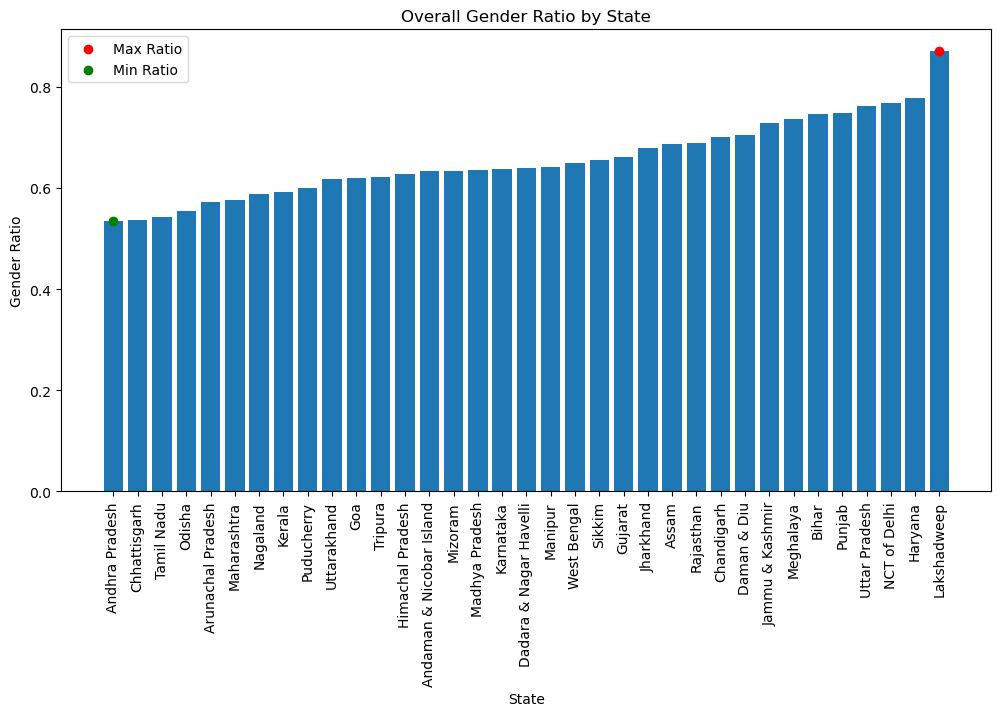

In [64]:


# Calculate overall gender ratio for each state
df_state_ratio = df_EDA.groupby('State')['Gender_ratio'].mean().reset_index()

# Sort the dataframe by gender ratio in ascending order
df_state_ratio_sorted = df_state_ratio.sort_values('Gender_ratio')

# Plotting the overall gender ratio for each state
plt.figure(figsize=(12, 6))
plt.bar(df_state_ratio_sorted['State'], df_state_ratio_sorted['Gender_ratio'])
plt.xlabel('State')
plt.ylabel('Gender Ratio')
plt.title('Overall Gender Ratio by State')

# Highlighting the state with the maximum gender ratio
max_ratio_state = df_state_ratio[df_state_ratio['Gender_ratio'] == df_state_ratio['Gender_ratio'].max()]
plt.scatter(max_ratio_state['State'], max_ratio_state['Gender_ratio'], color='red', label='Max Ratio')

# Highlighting the state with the minimum gender ratio
min_ratio_state = df_state_ratio[df_state_ratio['Gender_ratio'] == df_state_ratio['Gender_ratio'].min()]
plt.scatter(min_ratio_state['State'], min_ratio_state['Gender_ratio'], color='green', label='Min Ratio')

plt.legend()
plt.xticks(rotation=90)
plt.show()


In [65]:
max_gender_ratio = df_EDA['Gender_ratio'].max()
min_gender_ratio = df_EDA['Gender_ratio'].min()

District_with_max_ratio = df_EDA.loc[df_EDA['Gender_ratio'] == max_gender_ratio, 'Area Name'].values[0]
District_with_min_ratio = df_EDA.loc[df_EDA['Gender_ratio'] == min_gender_ratio, 'Area Name'].values[0]

print("Maximum Gender Ratio: {} (District: {})".format(max_gender_ratio, District_with_max_ratio))
print("Minimum Gender Ratio: {} (District: {})".format(min_gender_ratio, District_with_min_ratio))


Maximum Gender Ratio: 0.87 (District: Lakshadweep)
Minimum Gender Ratio: 0.44 (District: Koraput)


**2)Which is the most literate state and least literate state?.**

* **Let's add two columns of Total_Population and Total_Literate**

In [66]:
df_EDA['Total_Pop']= df_EDA['TOT_M'] + df_EDA['TOT_F']

In [67]:
df_EDA['Total_Lit'] = df_EDA['M_LIT'] + df_EDA['F_LIT']

In [68]:
df_EDA.head()

,State,Area Name,TOT_M,TOT_F,M_06,F_06,M_LIT,F_LIT,TOT_WORK_M,TOT_WORK_F,Gender_ratio,Total_Pop,Total_Lit
0,Jammu & Kashmir,Kupwara,23388,29796,5862,6196,13381,11364,6723,3752,0.78,53184,24745
1,Jammu & Kashmir,Badgam,19585,23102,4482,3733,10513,7891,6982,4200,0.85,42687,18404
2,Jammu & Kashmir,Leh(Ladakh),6546,10964,1082,1018,4534,5840,2775,4800,0.60,17510,10374
3,Jammu & Kashmir,Kargil,2784,4206,563,677,1842,1962,1002,1118,0.66,6990,3804
4,Jammu & Kashmir,Punch,20591,29981,5157,4587,13243,13477,5717,7692,0.69,50572,26720


In [69]:
df_EDA['Lit_ratio'] = df_EDA['Total_Lit']/df_EDA['Total_Pop']

In [70]:
#Calculate the average literacy ratio state-wise
avg_lit_ratio = df_EDA.groupby('State')['Lit_ratio'].mean()

# Find the most and least literate state
most_literate_state = avg_lit_ratio.idxmax()
least_literate_state = avg_lit_ratio.idxmin()

print("Most literate state:", most_literate_state)
print("Least literate state:", least_literate_state)

Most literate state: Kerala
Least literate state: Bihar


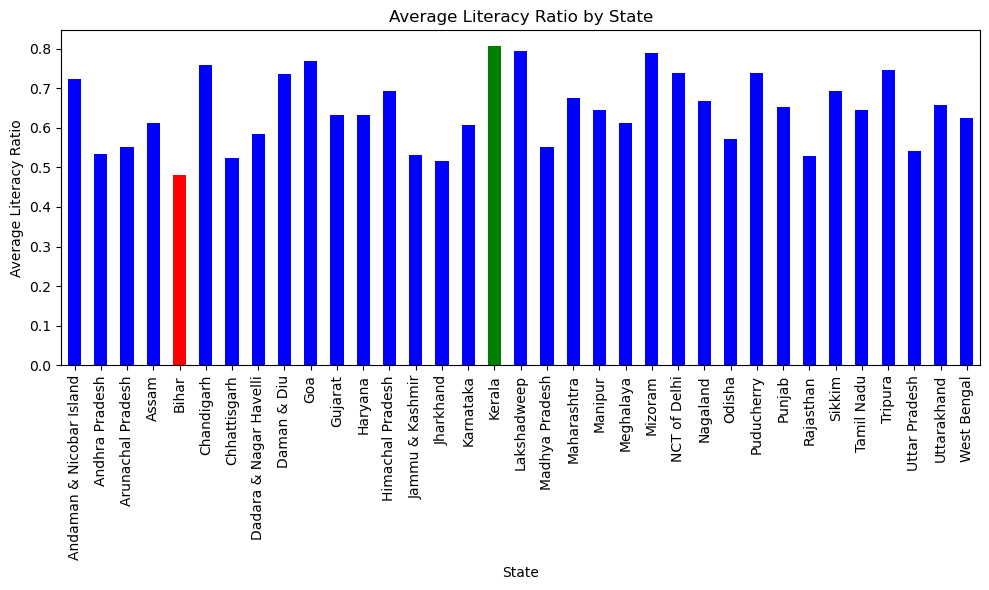

In [71]:
plt.figure(figsize=(10, 6))

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Average Literacy Ratio')
plt.title('Average Literacy Ratio by State')

bar_plot = avg_lit_ratio.plot(kind='bar', color='blue')

bar_plot.patches[avg_lit_ratio.index.get_loc(most_literate_state)].set_facecolor('green')
bar_plot.patches[avg_lit_ratio.index.get_loc(least_literate_state)].set_facecolor('red')


# Rotating the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

- 3)Find the male literacy and female literacy according to state and also mention the most and least male and female literate state

In [72]:
# Calculate male literacy and female literacy ratios
df_EDA['M_LIT_ratio'] = df_EDA['M_LIT'] / df_EDA['TOT_M']
df_EDA['F_LIT_ratio'] = df_EDA['F_LIT'] / df_EDA['TOT_F']


# Find the state with the highest and lowest male literacy rate
max_m_lit_state = df_EDA.loc[df_EDA['M_LIT_ratio'].idxmax(), 'State']
min_m_lit_state = df_EDA.loc[df_EDA['M_LIT_ratio'].idxmin(), 'State']

# Find the state with the highest and lowest female literacy rate
max_f_lit_state = df_EDA.loc[df_EDA['F_LIT_ratio'].idxmax(), 'State']
min_f_lit_state = df_EDA.loc[df_EDA['F_LIT_ratio'].idxmin(), 'State']

# Print the results
print("Male literacy and female literacy according to state:")
print(df_EDA[['State', 'M_LIT_ratio', 'F_LIT_ratio']])
print()
print("State with the highest male literacy rate:", max_m_lit_state)
print("State with the lowest male literacy rate:", min_m_lit_state)
print("State with the highest female literacy rate:", max_f_lit_state)
print("State with the lowest female literacy rate:", min_f_lit_state)

Male literacy and female literacy according to state:
                        State  M_LIT_ratio  F_LIT_ratio
0             Jammu & Kashmir     0.572131     0.381393
1             Jammu & Kashmir     0.536788     0.341572
2             Jammu & Kashmir     0.692637     0.532652
3             Jammu & Kashmir     0.661638     0.466476
4             Jammu & Kashmir     0.643145     0.449518
..                        ...          ...          ...
635                Puducherry     0.848173     0.864443
636                Puducherry     0.833630     0.655802
637  Andaman & Nicobar Island     0.766301     0.609125
638  Andaman & Nicobar Island     0.808846     0.658138
639  Andaman & Nicobar Island     0.842865     0.740318

[640 rows x 3 columns]

State with the highest male literacy rate: Maharashtra
State with the lowest male literacy rate: Madhya Pradesh
State with the highest female literacy rate: Mizoram
State with the lowest female literacy rate: Madhya Pradesh


**4)which state has highest total working population and lowest working population in terms of percentage of their total population?**

In [73]:
# Calculate the percentage of working population
df_EDA['Working_Pop_Percentage'] = ((df_EDA['TOT_WORK_M'] + df_EDA['TOT_WORK_F']) / (df_EDA['TOT_M'] + df_EDA['TOT_F'])) * 100

# Find the state with the highest total working population percentage
max_working_pop_state = df_EDA.loc[df_EDA['Working_Pop_Percentage'].idxmax(), 'State']

# Find the state with the lowest total working population percentage
min_working_pop_state = df_EDA.loc[df_EDA['Working_Pop_Percentage'].idxmin(), 'State']

# Print the results
print("State with the highest total working population percentage:", max_working_pop_state)
print("State with the lowest total working population percentage:", min_working_pop_state)

State with the highest total working population percentage: Nagaland
State with the lowest total working population percentage: Jammu & Kashmir


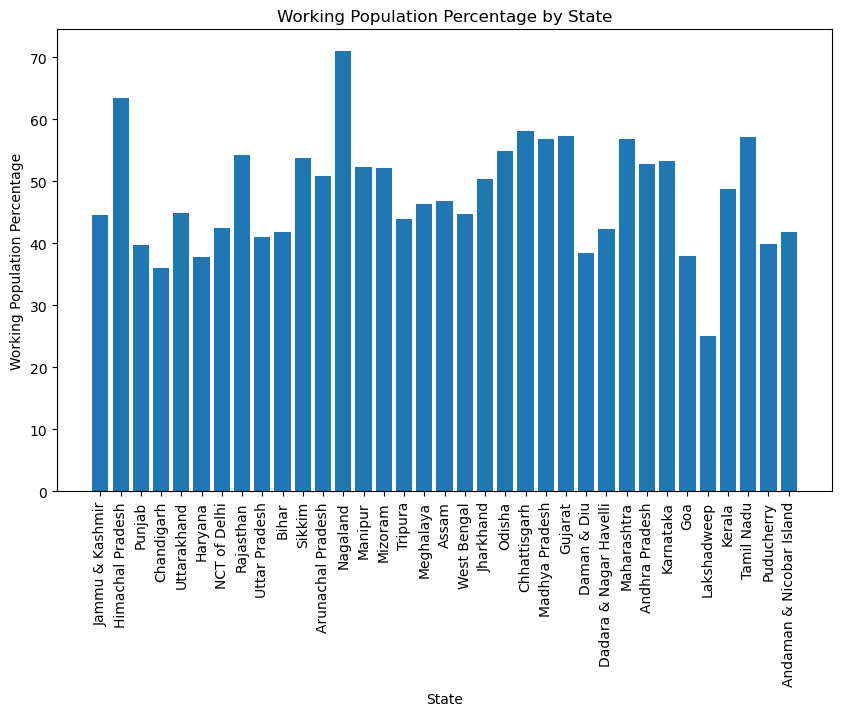

In [74]:
import matplotlib.pyplot as plt

# Create a bar plot for working population percentages
plt.figure(figsize=(10, 6))
plt.bar(df_EDA['State'], df_EDA['Working_Pop_Percentage'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Working Population Percentage')
plt.title('Working Population Percentage by State')
plt.show()


**5)which state has highest female to male literacy?**

In [75]:
df_EDA['F_M_Lit_Ratio'] = df_EDA['F_LIT'] / df_EDA['M_LIT']

# Calculate the mean of the female to male literacy ratios by state
mean_ratios = df_EDA.groupby('State')['F_M_Lit_Ratio'].mean()

# Find the state with the highest mean female to male literacy ratio
max_ratio_state = mean_ratios.idxmax()

# Print the result
print("State with the highest mean female to male literacy ratio:", max_ratio_state)

State with the highest mean female to male literacy ratio: Kerala


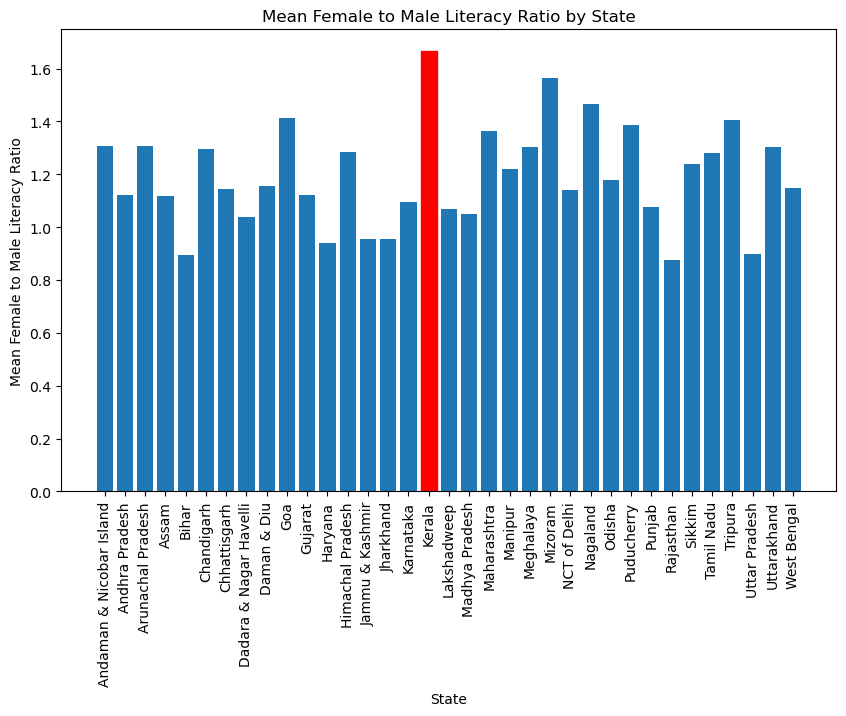

In [76]:
import matplotlib.pyplot as plt

# Create a bar plot for the mean female to male literacy ratios
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_ratios.index, mean_ratios.values)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Mean Female to Male Literacy Ratio')
plt.title('Mean Female to Male Literacy Ratio by State')

# Find the index of the state with the highest mean female to male literacy ratio
max_ratio_state = mean_ratios.idxmax()
max_ratio_index = mean_ratios.index.get_loc(max_ratio_state)

# Set the color of the bar for the state with the highest mean ratio to red
bars[max_ratio_index].set_color('red')

plt.show()

# Q.We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?

**Let's retain the numerical value first **

In [77]:
df.drop(['State', 'Area Name', 'State Code', 'Dist.Code'], axis=1, inplace=True)


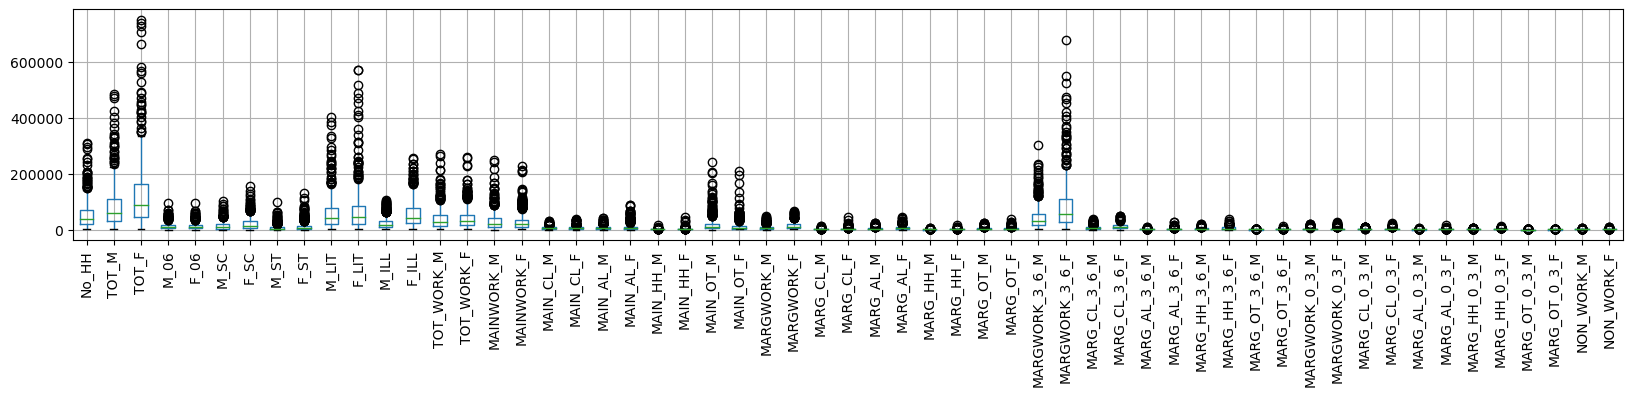

In [78]:
df.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

In [79]:
print('Percentage of data that are outliers=',np.round((2399/(640*57))*100,2))

Percentage of data that are outliers= 6.58


- **Given that the data represents population census data, outliers in this context may not necessarily be treated as errors or anomalies. Population data can naturally have extreme values for certain variables, such as the number of households or the total population in an area.**

- **In the case of population census data, extreme values may represent areas with unique characteristics, such as highly populated cities or sparsely populated regions. These extreme values can provide valuable insights into the distribution and characteristics of the population.**

- **Considering this, treating outliers in population census data may not be necessary unless there is evidence of data errors or if they significantly affect the analysis or interpretation of the results.**

# Q.Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

* **Let's draw a boxplot before scaling**

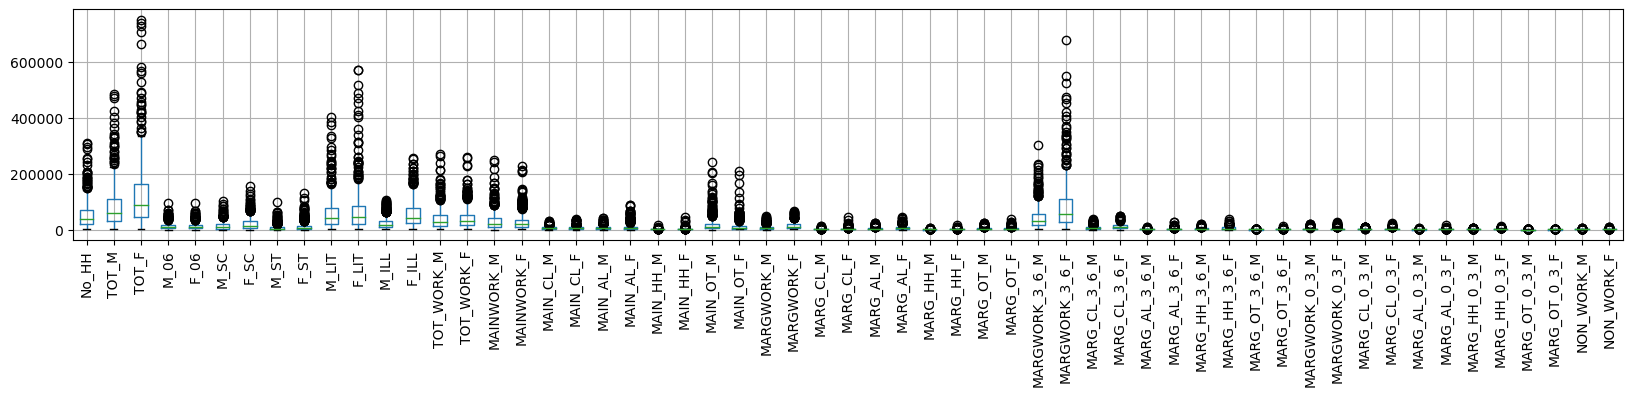

In [80]:
df.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

**We can observe significant outliers in the data.**

In [81]:
#Scale the data using zscore method
from scipy.stats import zscore
df_scaled = df.apply(zscore)

In [82]:
df_scaled

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.995677,-0.978990,-0.974268,-0.971387,-0.948916,-0.957326,-0.955667,-0.625124,-0.640197,-0.913820,...,-0.914299,-0.972530,-0.553861,-0.499744,-0.735831,-0.816489,-0.662068,-0.648604,-0.783468,-0.723232
636,-0.844340,-0.921822,-0.886965,-0.936754,-0.919757,-0.803806,-0.765670,-0.625124,-0.640197,-0.853390,...,-0.831668,-0.868461,-0.547238,-0.487208,-0.685961,-0.734425,-0.624966,-0.574290,-0.655625,-0.587993
637,-1.038465,-1.069066,-1.054885,-1.051356,-1.035331,-0.958783,-0.957049,-0.522953,-0.529880,-1.016367,...,-0.865930,-0.941309,-0.533992,-0.496162,-0.733206,-0.812701,-0.504388,-0.496746,-0.711352,-0.690247
638,-0.986758,-1.019276,-1.007472,-1.008195,-0.996541,-0.958783,-0.957049,-0.622297,-0.637046,-0.962328,...,-0.844432,-0.927673,-0.500878,-0.460344,-0.721395,-0.803232,-0.652792,-0.635680,-0.672015,-0.661660


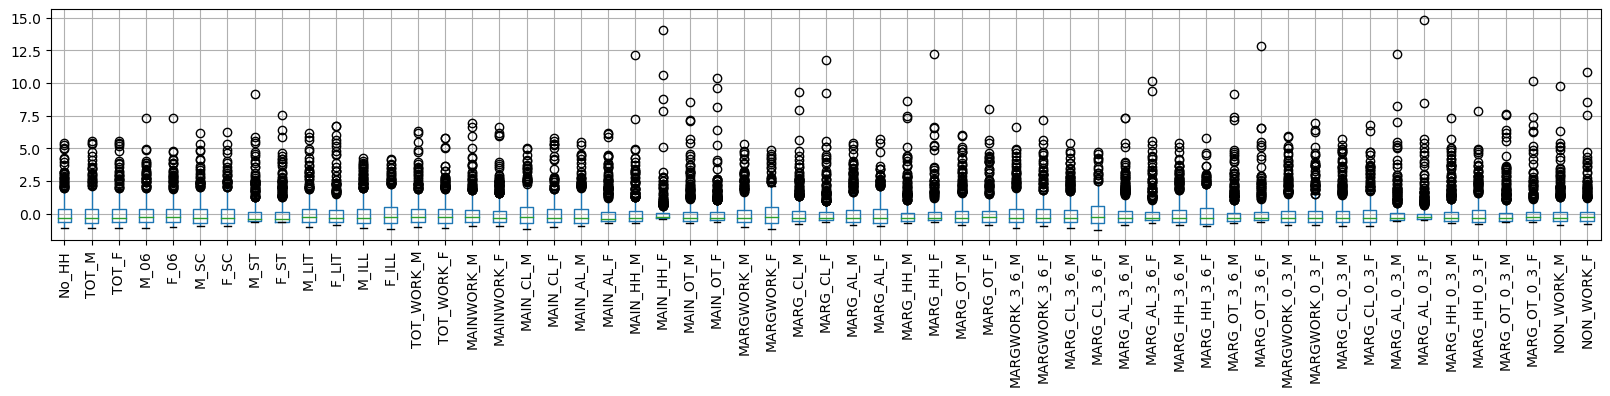

In [83]:
df_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

**Observation**:

- **We used the Standardization (Z-score normalization) method for scaling purpose. This method subtracts the mean and divides by the standard deviation of the data. Standardization does not remove or change the values of outliers, but it can shift their relative positions compared to other data points. Outliers will still exist after standardization, but their values will be expressed in terms of standard deviations from the mean.**
- **Upon comparing the visualizations of outliers before and after scaling, it can be observed that the outliers themselves have not changed. However, scaling has led to a transformation of their values, resulting in a shift in their relative positions in relation to the rest of the data.**

# Q.Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix ,Get eigen values, and eigen vector.


In [84]:
len(df_scaled.columns)

57

### Let's create a covariance matrix of the variables**

In [85]:
np.round(df_scaled.cov(),2)


,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
No_HH,1.00,0.92,0.97,0.80,0.80,0.78,0.83,0.15,0.17,0.93,...,0.56,0.56,0.07,0.05,0.37,0.42,0.49,0.54,0.76,0.74
TOT_M,0.92,1.00,0.98,0.95,0.95,0.84,0.83,0.09,0.09,0.99,...,0.70,0.60,0.17,0.12,0.50,0.44,0.65,0.59,0.85,0.72
TOT_F,0.97,0.98,1.00,0.91,0.91,0.82,0.83,0.12,0.13,0.99,...,0.66,0.60,0.14,0.10,0.45,0.44,0.59,0.57,0.83,0.75
M_06,0.80,0.95,0.91,1.00,1.00,0.78,0.75,0.06,0.04,0.91,...,0.76,0.65,0.27,0.20,0.60,0.51,0.69,0.57,0.79,0.65
F_06,0.80,0.95,0.91,1.00,1.00,0.77,0.74,0.07,0.05,0.91,...,0.76,0.65,0.26,0.19,0.61,0.52,0.70,0.58,0.78,0.65
M_SC,0.78,0.84,0.82,0.78,0.77,1.00,0.99,-0.05,-0.05,0.82,...,0.67,0.57,0.18,0.13,0.52,0.46,0.67,0.59,0.74,0.58
F_SC,0.83,0.83,0.83,0.75,0.74,0.99,1.00,-0.01,-0.01,0.82,...,0.65,0.59,0.16,0.12,0.51,0.49,0.63,0.59,0.72,0.60
M_ST,0.15,0.09,0.12,0.06,0.07,-0.05,-0.01,1.00,0.99,0.09,...,0.12,0.20,0.03,0.01,0.13,0.24,-0.01,0.09,0.12,0.15
F_ST,0.17,0.09,0.13,0.04,0.05,-0.05,-0.01,0.99,1.00,0.09,...,0.12,0.22,0.02,0.00,0.14,0.27,-0.01,0.10,0.11,0.15
M_LIT,0.93,0.99,0.99,0.91,0.91,0.82,0.82,0.09,0.09,1.00,...,0.65,0.56,0.14,0.10,0.42,0.38,0.60,0.55,0.85,0.74


In [86]:
correlation_matrix =np.round(df_scaled.corr(),2)
correlation_matrix

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
No_HH,1.00,0.92,0.97,0.80,0.80,0.78,0.82,0.15,0.17,0.93,...,0.56,0.56,0.07,0.05,0.37,0.42,0.49,0.54,0.76,0.74
TOT_M,0.92,1.00,0.98,0.95,0.95,0.84,0.83,0.09,0.09,0.99,...,0.70,0.60,0.17,0.12,0.50,0.44,0.65,0.59,0.84,0.72
TOT_F,0.97,0.98,1.00,0.91,0.91,0.82,0.83,0.12,0.13,0.99,...,0.66,0.60,0.14,0.10,0.45,0.44,0.59,0.57,0.83,0.75
M_06,0.80,0.95,0.91,1.00,1.00,0.78,0.75,0.06,0.04,0.91,...,0.76,0.65,0.27,0.20,0.60,0.51,0.69,0.57,0.78,0.65
F_06,0.80,0.95,0.91,1.00,1.00,0.77,0.74,0.07,0.05,0.91,...,0.76,0.65,0.26,0.19,0.61,0.52,0.70,0.57,0.78,0.65
M_SC,0.78,0.84,0.82,0.78,0.77,1.00,0.99,-0.05,-0.05,0.82,...,0.67,0.57,0.18,0.13,0.52,0.46,0.66,0.59,0.74,0.58
F_SC,0.82,0.83,0.83,0.75,0.74,0.99,1.00,-0.01,-0.01,0.81,...,0.65,0.59,0.16,0.12,0.51,0.49,0.63,0.59,0.72,0.60
M_ST,0.15,0.09,0.12,0.06,0.07,-0.05,-0.01,1.00,0.99,0.09,...,0.12,0.20,0.03,0.01,0.13,0.24,-0.01,0.09,0.12,0.15
F_ST,0.17,0.09,0.13,0.04,0.05,-0.05,-0.01,0.99,1.00,0.09,...,0.12,0.22,0.02,0.00,0.14,0.27,-0.01,0.10,0.11,0.15
M_LIT,0.93,0.99,0.99,0.91,0.91,0.82,0.81,0.09,0.09,1.00,...,0.65,0.56,0.14,0.10,0.42,0.38,0.60,0.55,0.85,0.74


**We can see that the covariance matrix and correlation are both same .Let's create a heat map to visualise the correlation.**

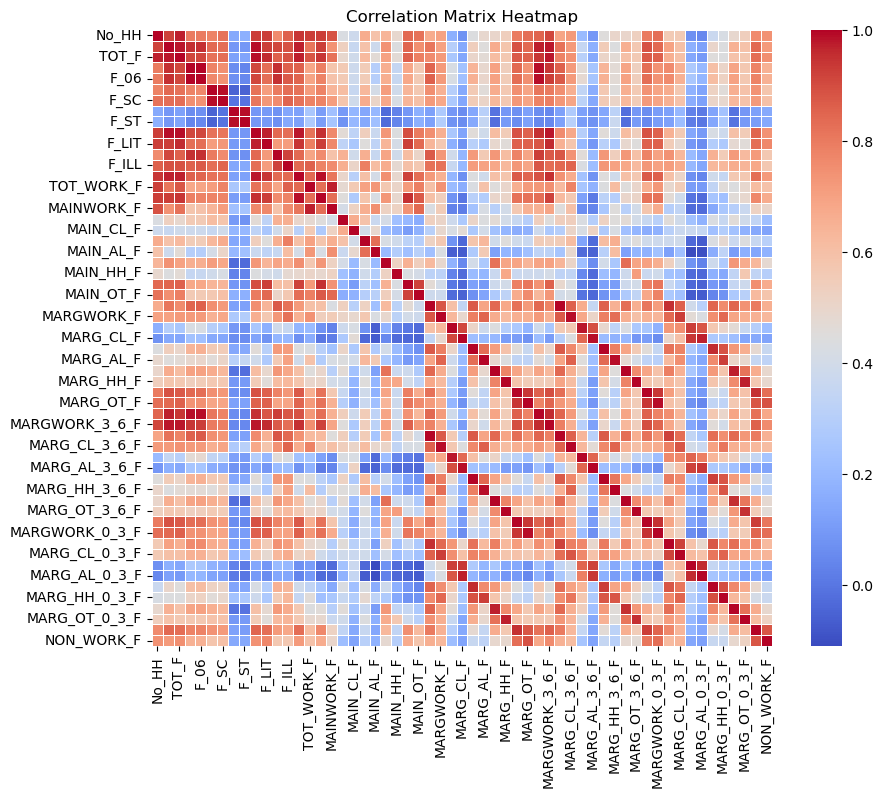

In [87]:
# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

**Observation:**

- **We can see that most of the correlation matrix tends to be in orange shade which reflects a strong correlation of the independent variables. this implies there is a strong information content in the mathematical space which is not utlized.**

### **Let's perform Bartlett's sphericity test which is used to determine whether a correlation matrix is suitable for PCA**

In [88]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled)
p_value

0.0

- **Since p value is less than .05 , we reject the null hypothesis. The variables have a significant correlation to perform the PCA.**

### **Let's perform Kmo test to evaluate the sampling adequacy of the variables .**

In [89]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

0.8039889932781299

**Since the value is above .7 , we have enough samples to perform PCA .**

In [90]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=57, random_state=123)
pca_transformed = pca.fit_transform(df_scaled)

In [91]:
#Extract eigen Vectors
pca_components=np.round(pca.components_,2)
pca_components

array([[ 0.16,  0.17,  0.17, ...,  0.13,  0.15,  0.13],
       [-0.13, -0.09, -0.1 , ...,  0.05, -0.07, -0.07],
       [-0.  ,  0.06,  0.04, ..., -0.08,  0.11,  0.1 ],
       ...,
       [ 0.  ,  0.36,  0.2 , ...,  0.04, -0.01, -0.03],
       [ 0.  ,  0.01, -0.  , ...,  0.02, -0.08,  0.04],
       [ 0.  , -0.21,  0.3 , ...,  0.  , -0.12,  0.02]])

In [92]:
#Check the eigen values
pca_variance= np.round(pca.explained_variance_,2)
pca_variance

array([3.181e+01, 7.870e+00, 4.150e+00, 3.670e+00, 2.210e+00, 1.940e+00,
       1.180e+00, 7.500e-01, 6.200e-01, 5.300e-01, 4.300e-01, 3.500e-01,
       3.000e-01, 2.800e-01, 1.900e-01, 1.400e-01, 1.100e-01, 1.100e-01,
       1.000e-01, 8.000e-02, 6.000e-02, 4.000e-02, 4.000e-02, 3.000e-02,
       3.000e-02, 2.000e-02, 1.000e-02, 1.000e-02, 1.000e-02, 1.000e-02,
       1.000e-02, 1.000e-02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00])

In [93]:
pca_variance_ratio=pca.explained_variance_ratio_
pca_variance_ratio

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 1.97368768e-32,
       1.86010049e-32, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 2.48360653e-33,
      

In [94]:
df_extracted_loadings = pd.DataFrame(pca_components.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13','PC14', 'PC15', 'PC16', 'PC17', 'PC18',
                                               'PC19','PC20', 'PC21', 'PC22', 'PC23', 'PC24','PC25','PC26', 'PC27', 'PC28', 'PC29', 'PC30',
                                               'PC31','PC32', 'PC33', 'PC34', 'PC35', 'PC36','PC37','PC38', 'PC39', 'PC40', 'PC41', 'PC42',
                                                'PC43', 'PC44', 'PC45', 'PC46', 'PC47','PC48','PC49', 'PC50', 'PC51', 'PC52', 'PC53',
                                               'PC54','PC55', 'PC56', 'PC57'],
                                    index = df_scaled.columns)

In [95]:
df_extracted_loadings.T

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
PC1,0.16,0.17,0.17,0.16,0.16,0.15,0.15,0.03,0.03,0.16,...,0.15,0.14,0.05,0.04,0.12,0.12,0.14,0.13,0.15,0.13
PC2,-0.13,-0.09,-0.10,-0.02,-0.02,-0.05,-0.05,0.03,0.03,-0.12,...,0.15,0.18,0.25,0.24,0.19,0.18,0.08,0.05,-0.07,-0.07
PC3,-0.00,0.06,0.04,0.06,0.05,0.00,-0.03,-0.12,-0.14,0.08,...,0.05,0.02,0.27,0.28,-0.14,-0.20,-0.02,-0.08,0.11,0.10
PC4,-0.13,-0.02,-0.07,0.01,0.01,0.01,-0.03,-0.22,-0.23,-0.04,...,0.09,-0.02,-0.10,-0.14,0.13,0.00,0.23,0.21,0.08,0.02
PC5,-0.01,-0.03,-0.01,-0.05,-0.04,-0.17,-0.16,0.43,0.44,-0.01,...,0.08,0.13,-0.05,-0.05,0.06,0.13,-0.04,0.00,0.16,0.24
PC6,0.00,-0.07,-0.04,-0.16,-0.15,-0.06,-0.04,0.22,0.23,-0.06,...,-0.06,-0.00,0.07,0.08,-0.12,-0.11,0.06,0.30,-0.05,-0.02
PC7,-0.12,0.09,-0.00,0.17,0.17,-0.00,-0.08,0.41,0.36,0.05,...,-0.01,-0.20,-0.04,-0.10,0.01,-0.15,0.08,-0.07,-0.02,-0.20
PC8,0.06,0.11,0.09,0.17,0.17,-0.13,-0.14,0.02,0.01,0.10,...,0.03,0.00,0.08,0.06,0.14,0.07,-0.17,0.04,-0.12,-0.20
PC9,0.00,0.02,0.01,-0.06,-0.06,0.04,0.04,0.02,0.04,0.05,...,-0.01,-0.03,0.03,0.05,0.05,0.12,0.22,-0.08,-0.16,-0.35
PC10,0.02,-0.02,-0.04,-0.15,-0.17,0.45,0.45,0.16,0.13,-0.01,...,0.15,0.05,0.15,0.13,0.07,-0.04,-0.04,0.07,0.17,0.05


**It can be observed that 90 percent of information content is retained by first 6 PCA'. Let's draw a scree plot for the same.**


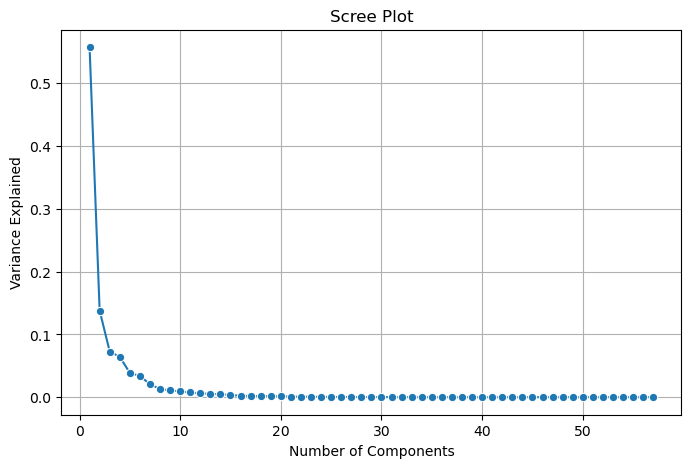

In [96]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,58),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

# Q.Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

In [97]:
#Choose the PCs basis cumulative explained variance 
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6']]

In [98]:
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6
No_HH,0.16,-0.13,-0.00,-0.13,-0.01,0.00
TOT_M,0.17,-0.09,0.06,-0.02,-0.03,-0.07
TOT_F,0.17,-0.10,0.04,-0.07,-0.01,-0.04
M_06,0.16,-0.02,0.06,0.01,-0.05,-0.16
F_06,0.16,-0.02,0.05,0.01,-0.04,-0.15
M_SC,0.15,-0.05,0.00,0.01,-0.17,-0.06
F_SC,0.15,-0.05,-0.03,-0.03,-0.16,-0.04
M_ST,0.03,0.03,-0.12,-0.22,0.43,0.22
F_ST,0.03,0.03,-0.14,-0.23,0.44,0.23
M_LIT,0.16,-0.12,0.08,-0.04,-0.01,-0.06


In [99]:
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(df_scaled)

In [100]:
#Just create a dataframe out of fit_transformed scaled data above
pca_final_df = np.round(pd.DataFrame(pca_final, columns = df_selected.columns),2)
pca_final_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-4.62,0.14,0.33,1.54,0.35,-0.42
1,-4.77,-0.11,0.24,1.96,-0.15,0.42
2,-5.96,-0.29,0.37,0.62,0.48,0.28
3,-6.28,-0.50,0.21,1.07,0.30,0.05
4,-4.48,0.89,1.08,0.54,0.80,0.34


In [101]:
pca_final_df.shape

(640, 6)

In [102]:
from matplotlib.patches import Rectangle

In [103]:
# Component loading when PC's are kept as 6
df_pca_loading = pd.DataFrame(pca.components_.round(2),columns=list(df_scaled))
df_pca_loading.shape

(6, 57)

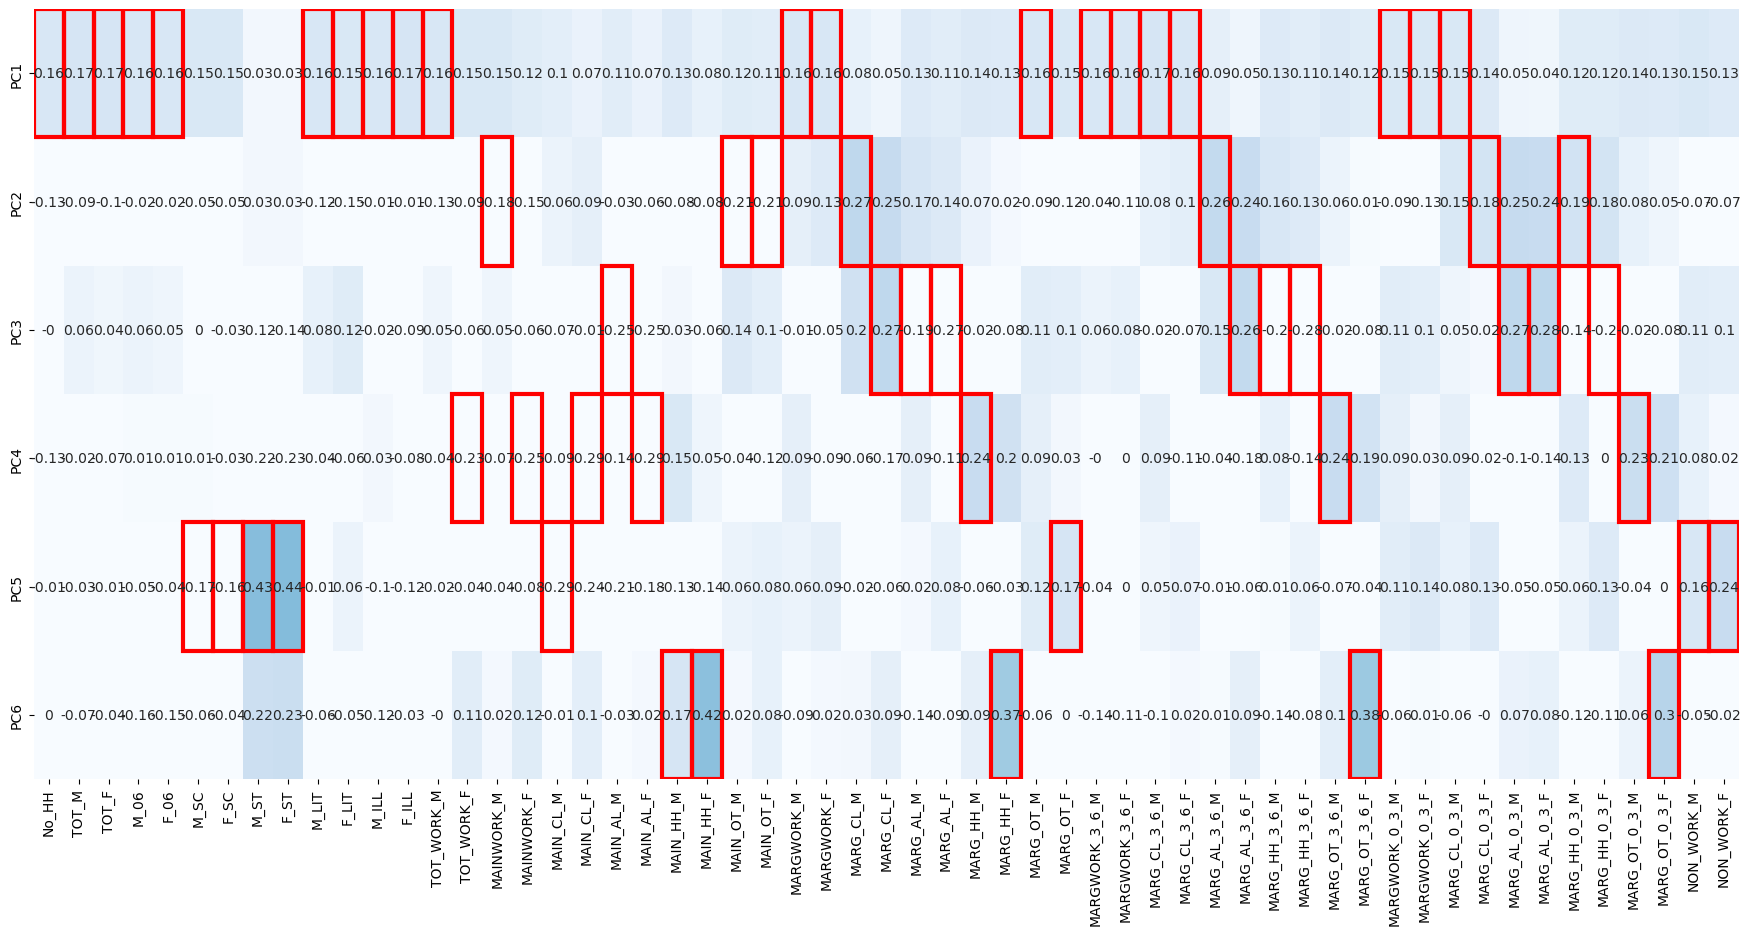

In [104]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2','PC3','PC4','PC5','PC6'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

 **Observations**

1) PCA1:

- It captures the information regarding population(TOT_M,TOT_F),literacy(M_LIT,F_LIT,M_ILL,F_ILL),,Marginal Agriculture Labourers Population 3-6 Male/female.

2) PCA2:
- It captures information about Main Other Workers Population Male/female.

3) PCA3:
- It captures Main Other Workers Population Male/female,Marginal Worker Population Male/female.

4) PCA4:
- It captures Total worker population Male/Female

5) PCA5:
- It captures the population of SC/St population (M_SC,F_SC,F_ST,M_ST)

6) PCA6:
- It captures Main Household Industries Population Male/female.



# Q. Write linear equation for first PC.

In [105]:
for i in range(0,57):
     print("(",np.round(pca.components_[0][i],2),")",'*',df_scaled.columns[i], end=' + ')

( 0.16 ) * No_HH + ( 0.17 ) * TOT_M + ( 0.17 ) * TOT_F + ( 0.16 ) * M_06 + ( 0.16 ) * F_06 + ( 0.15 ) * M_SC + ( 0.15 ) * F_SC + ( 0.03 ) * M_ST + ( 0.03 ) * F_ST + ( 0.16 ) * M_LIT + ( 0.15 ) * F_LIT + ( 0.16 ) * M_ILL + ( 0.17 ) * F_ILL + ( 0.16 ) * TOT_WORK_M + ( 0.15 ) * TOT_WORK_F + ( 0.15 ) * MAINWORK_M + ( 0.12 ) * MAINWORK_F + ( 0.1 ) * MAIN_CL_M + ( 0.07 ) * MAIN_CL_F + ( 0.11 ) * MAIN_AL_M + ( 0.07 ) * MAIN_AL_F + ( 0.13 ) * MAIN_HH_M + ( 0.08 ) * MAIN_HH_F + ( 0.12 ) * MAIN_OT_M + ( 0.11 ) * MAIN_OT_F + ( 0.16 ) * MARGWORK_M + ( 0.16 ) * MARGWORK_F + ( 0.08 ) * MARG_CL_M + ( 0.05 ) * MARG_CL_F + ( 0.13 ) * MARG_AL_M + ( 0.11 ) * MARG_AL_F + ( 0.14 ) * MARG_HH_M + ( 0.13 ) * MARG_HH_F + ( 0.16 ) * MARG_OT_M + ( 0.15 ) * MARG_OT_F + ( 0.16 ) * MARGWORK_3_6_M + ( 0.16 ) * MARGWORK_3_6_F + ( 0.17 ) * MARG_CL_3_6_M + ( 0.16 ) * MARG_CL_3_6_F + ( 0.09 ) * MARG_AL_3_6_M + ( 0.05 ) * MARG_AL_3_6_F + ( 0.13 ) * MARG_HH_3_6_M + ( 0.11 ) * MARG_HH_3_6_F + ( 0.14 ) * MARG_OT_3_6_M + ( 0